In [1]:
import numpy

In [2]:
N = 50
p = 500

In [20]:
X = numpy.random.standard_normal(N * p).reshape((N, p))

In [8]:
y = numpy.random.standard_normal(N) <= 0

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

(array([314.,  61.,  52.,  36.,  18.,  10.,   2.,   3.,   0.,   4.]),
 array([0.        , 0.02558651, 0.05117301, 0.07675952, 0.10234602,
        0.12793253, 0.15351904, 0.17910554, 0.20469205, 0.23027855,
        0.25586506]),
 <a list of 10 Patch objects>)

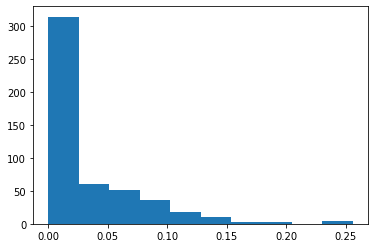

In [25]:
plt.hist(mutual_info_classif(X, y))

In [26]:
# Here we overfit!
X_selected = SelectKBest(score_func=mutual_info_classif, k=20).fit_transform(X, y)

In [24]:
cross_val_score(RandomForestClassifier(n_estimators=100), X_selected, y, cv=5)

array([0.72727273, 0.90909091, 0.6       , 0.66666667, 0.77777778])

# Pipelines

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
?Pipeline

Init signature: Pipeline(steps, memory=None, verbose=False)
Docstring:     
Pipeline of transforms with a final estimator.

Sequentially apply a list of transforms and a final estimator.
Intermediate steps of the pipeline must be 'transforms', that is, they
must implement fit and transform methods.
The final estimator only needs to implement fit.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters.
For this, it enables setting parameters of the various steps using their
names and the parameter name separated by a '__', as in the example below.
A step's estimator may be replaced entirely by setting the parameter
with its name to another estimator, or a transformer removed by setting
it to 'passthrough' or ``None``.

Read more in the :ref:`User Guide <pipeline>`.

Parameters
----------
steps : list
    List of (name, transform) tuples (im

In [29]:
pipeline = Pipeline([('feature_selection', SelectKBest(mutual_info_classif, k=20)),
                     ('classifier', RandomForestClassifier(n_estimators=50))])

In [31]:
scores = cross_val_score(pipeline, X, y, cv=5)

In [32]:
scores.mean()

0.5141414141414142

In [34]:
scores.std()

0.10052408326969478